<h1 style="font-family: Arial; font-weight: 900; color: magenta; text-align: center;">ARTIFICIAL NEURAL NETWORKS</h1><br>

<br/><br/><div style="font-family: Arial; color: darkblue; font-size: 16; font-weight: 600; "><a id="toc"></a>
In this part 11:
    <p style="margin: 0 0 0 2rem; font-weight: 800">[1. Artificial neural networks (ANN)](#1)</p>
        <p style="margin: 0 0 0 4rem; font-size: 14">[1a. Architecture of an ANN - Forward pass](#1a)</p>
        <p style="margin: 0 0 0 4rem; font-size: 14">[1b. Examples of activation functions](#1b)</p>
        <p style="margin: 0 0 0 4rem; font-size: 14">[1c. Training of an ANN - SGD with Backpropagation](#1c)</p>
        <p style="margin: 0 0 0 4rem; font-size: 14">[1d. Training of an ANN - BGD with Backpropagation](#1d)</p>
    <p style="margin: 0 0 0 2rem; font-weight: 800">[2. Classifying handwritten digits](#2)</p>
        <p style="margin: 0 0 0 4rem; font-size: 14">[2a. Preparing the MNIST dataset](#2a)</p>
        <p style="margin: 0 0 0 4rem; font-size: 14">[2b. Implementing an MLP](#2b)</p>
        <p style="margin: 0 0 0 4rem; font-size: 14">[2c. Training an MLP](#2c)</p>
        <p style="margin: 0 0 0 4rem; font-size: 14">[2d. Evaluating an MLP](#2d)</p>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from colorama import Fore, Back, Style
# define some strings for cleaner codes
BB = Fore.BLUE + Style.BRIGHT
MB = Fore.MAGENTA + Style.BRIGHT
GB = Fore.GREEN + Style.BRIGHT

<a id="1"></a><br><br><div style="font-family: Arial">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 16; font-weight: 800"><font color='darkpink'>1. ARTIFICIAL NEURAL NETWORKS (ANN)</h4><font color='darkblue'>
    <p style="margin: 0 0 .5rem 4rem; font-size: 14; font-weight: 600"><font color='darkpink'>1a. Architecture of an ANN - Forward pass<a id="1a"></a></p><font color='darkblue'>
    <p style="margin: 0; font-size: 12; font-weight: 500">$\quad$
        In a Machine Learning classification task we typically work with an input, which is an input vector representing an observation or an input matrix whose ranks are the known instances, and an output, which is the predicted class for the observation, or a vector of predicted classes. A model is trained, trying to minimize a cost function representing the differences between the predicted classes and the actual targets.<br>$\quad$
        In Deep Learning we follow a similar architecture, but there may be several layers, called <font color = 'darkpink'>hidden layers<font color = 'darkblue'>, between the input and the output layers. They are called hidden because we typically do not see what values they contain. The overall architecture is called an <font color = 'darkpink'>Artificial Neural Network<font color='darkblue'> (<font color = 'darkpink'>ANN<font color='darkblue'>). The <font color = 'darkpink'>number of layers<font color='darkblue'> is defined as the number of layers which actually transform the values it received; that is the number of hidden layers plus $1$ for the output layer. Below is a representation of a two-layer ANN, with the weights and biases used at each transformative layer; after an affine transformation of the values received, each layer applies an activation function (the composition of two affine functions being an affine function a layer without activation function could be integrated to the following layer); these activation functions have not been represented here :
        

<figure style="text-align: center;">
    <img src="11.1. A two-layer MLP.png" alt="Figure showing a general but simple Artificial Neural Network, called an MLP. It is composed of three columns, each composed of cells, and each cell of a column is linked to each cell of the following column, thus getting a network.
The first column is the input layer. For any k=1,...,n its k-th cell contains the k-th value of a given instance x, ie the value that x has for its k-th feature. The second column is the hidden layer. It is composed of d cells. Each link between a cell of the input layer and a cell of the hidden layer has a weight. To these weights, a bias is added, which is shown as independent from the input cells.
Similarly, the third column is the output layer. It is composed of t cells, and each link between a cell of the hidden layer and a cell of the output layer has a weight. To these weights, a bias is added, which is shown as independent from the hidden cells.
At last, from the output layer, the vector of predicted classes is computed." width="350" />
    <figcaption style="margin-top: .5rem; font-weight: bold; color: purple">A two-layer MLP</figcaption>
</figure>

<br><p style="margin: 0; font-size: 12; font-weight: 500"><font color='darkblue'>$\quad$
        Mathematically, an <font color = 'darkpink'>Artificial Neural Network<font color='darkblue'> (<font color = 'darkpink'>ANN<font color='darkblue'>) can be represented with :<br>
    * <font color = 'darkpink'>$\,X \in \mathbb{R}^{m \times d_0}\,$<font color='darkblue'> : the input matrix with <font color = 'darkpink'>$m$<font color='darkblue'> samples of <font color = 'darkpink'>$\,d_0 = n\,$<font color='darkblue'> features; $X$ can be a training matrix, a validation matrix, or any set of instances whose targets are known<br>
    * <font color = 'darkpink'>$\,L\,$<font color='darkblue'> hidden layers, indexed from $1$ to $\,L\,$; each layer is composed of <font color = 'darkpink'>$\,d_l\,$<font color='darkblue'> cells<br>
    * <font color = 'darkpink'>$\,W^{(l)} \in \mathbb{R}^{d_{l-1} \,\times\, d_l}\,$<font color='darkblue'> and <font color = 'darkpink'>$\,b_l \in \mathbb{R}^{1 \,\times\, d_l}\,$<font color='darkblue'> : the weights and biases used to compute the contents of the cells of the layer $l$ from the contents of the cells of the layer $(l-1)$<br>
    * <font color = 'darkpink'>$\,\sigma^{(l)}\,$<font color='darkblue'>, the activation function to apply to the contents of the cells of layer $l$ before computing the contents of the cells of layer $(l+1)$<font color='darkblue'>

<p style="margin: 0; font-size: 12; font-weight: 500"><font color='darkblue'>$\quad$
        For example, given an instance $x$, the ANN will define<font color='darkpink'>
        $$a^{(0)} = x \in \mathbb{R}^{1 \times\, d_0} \qquad (1)$$<font color = 'darkblue'>
    (a row vector). Then for each layer $l$ it will compute the <font color='darkpink'>pre-activation
        $$z^{(l)} = a^{(l-1)}\,W^{(l)} + b^{(l)} \in \mathbb{R}^{1 \times\, d_l} \qquad (2)$$<font color = 'darkblue'>
    and the <font color='darkpink'>activation
        $$a^{(l)} = \sigma^{(l)}(z^{(l)}) \in \mathbb{R}^{1 \times\, d_l} \qquad (3)$$<font color = 'darkblue'>
    (where the activation function is applied element-wise). In the end, the predicted class for $x$ is given by<font color='darkpink'>
        $$\hat{y} = a^{(L)} \in \mathbb{R}^{1 \times\, d_L} \qquad (4)$$<font color = 'darkblue'>
     where $d_L$ is the number of classes.<br><br><font color='darkblue'>$\quad$
        The ANN can compute the predicted classes for all of the input instances in one go. Starting from the input matrix $X$, the ANN will define<font color='darkpink'>
        $$A^{(0)} = X \in \mathbb{R}^{m \times\, d_0} \qquad (5)$$<font color='darkblue'>
    Then for each layer $l$ it will compute the <font color='darkpink'>pre-activations
        $$Z^{(l)} = A^{(l-1)}\,W^{(l)} + b^{(l)} \in \mathbb{R}^{m \times\, d_l} \qquad (6)$$<font color='darkblue'>
    where $\mathbf{1} \in \mathbb{R}^{m\times\,1}$ is the column vector of length $m$ whose components are all equal to $1$. Then the <font color='darkpink'>activations
        $$A^{(l)} = \sigma^{(l)}(Z^{(l)}) \in \mathbb{R}^{m \times\, d_l} \qquad (7)$$<font color='darkblue'>
    (element-wise). In the end, the predicted classes for the instances in $X$ are given by<font color = 'darkpink'>
        $$\hat{Y} = A^{(L)} \in \mathbb{R}^{m \times\, d_L} \qquad (8)$$

<br><p style="margin: 0; font-size: 12; font-weight: 500"><font color='purple'>$\quad$
        Note that an Artificial Neural Network is usually represented with vertical layers (alike the figure above). Hence an instance, which up to now was a row vector, is entered in the ANN as a column vector; the $i$-th neuron of the first layer then contains the value of the instance for its $i$-th feature. Hence in Deep Learning, contrary to Machine Learning, the instances are presented as columns and the features are presented as rows.<br>$\quad$
        The book uses the ML system of notations (equations $(1)$-$(8)$), but usual DL notations will use the transposes of these, and I will follow the DL notations. The input matrix is still <font color = 'darkpink'>$\,X \in \mathbb{R}^{m \times d_0}\,$<font color='purple'>, with <font color = 'darkpink'>$m$<font color='purple'> samples of <font color = 'darkpink'>$\,d_0 = n\,$<font color='purple'> features, but we will use <font color = 'darkpink'>$A^{(0)} = X^T$<font color='purple'> instead. As usual, $X$ can be a training matrix, a validation matrix, or, more generally, any set of instances whose targets are known (eg a mini-batch). The weight matrix of the $l$-th layer of an ANN will be <font color = 'darkpink'>$\,W^{(l)} \in \mathbb{R}^{d_l \,\times\, d_{l-1}}\,$<font color='purple'> and its bias will be <font color = 'darkpink'>$\,b_l \in \mathbb{R}^{d_l \,\times\, 1}\,$<font color='purple'>. In DL we usually use the system of equations :<font color = 'darkpink'>$\quad$
        $$a^{(0)} = x \in \mathbb{R}^{n \times 1} \qquad (1)'$$
        $$\forall l = 1, \cdots, L \qquad z^{(l)} = W^{(l)}\,a^{(l-1)} + b^{(l)} \in \mathbb{R}^{d_l \times 1} \qquad (2)'$$
        $$\forall l = 1, \cdots, L \qquad a^{(l)} = \sigma^{(l)}(z^{(l)}) \in \mathbb{R}^{d_l \times 1} \qquad (3)'$$
        $$\hat{y} = a^{(L)} \in \mathbb{R}^{d_L \times 1} \qquad (4)'$$
        $$A^{(0)} = X^T \in \mathbb{R}^{d_0 \times m} \qquad (5)'$$
        $$\forall l = 1, \cdots, L \qquad Z^{(l)} = W^{(l)}\,A^{(l-1)} + b^{(l)}\mathbf{1} \in \mathbb{R}^{d_l \times m} \qquad (6)'$$
        $$\forall l = 1, \cdots, L \qquad A^{(l)} = \sigma^{(l)}(Z^{(l)}) \in \mathbb{R}^{d_l \times m} \qquad (7)'$$
        $$\hat{Y} = A^{(L)} \in \mathbb{R}^{d_L \times m} \qquad (8)'$$<font color='purple'>
    where $\mathbf{1} \in \mathbb{R}^{1 \times m}$ is the row vector of length $m$ whose components are all equal to $1$.<font color='darkblue'><br><br>$\quad$
        Such an ANN is called a <font color='darkpink'>MultiLayer Perceptron<font color='darkblue'> (<font color='darkpink'>MLP<font color='darkblue'>) although "the artificial neurons in this network architecture are typically sigmoid units, not perceptrons" (perceptrons have been studied in part 2, "1. The perceptron").<br>$\quad$
        "MLP is a typical example of a <font color='darkpink'>feedforward<font color='darkblue'> artificial NN. The term feedforward refers to the fact that each layer serves as the input to the next layer without loops, in contrast to recurrent NNs - an architecture that we will discuss later" -.

<br><br><div style="font-family: Arial; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 14; font-weight: 600"><font color='darkpink'>1b. Examples of activation functions<a id="1b"></a></p>
    <p style="margin: 0; font-size: 12; font-weight: 500">$\quad$
        (pr : this part is all mine, with the help of ChatGPT)<br>$\quad$
        The book develops the example of an ANN where the activation functions of the layers are  the <font color='darkpink'>(logistic) sigmoid function<font color='darkblue'> introduced in part 3, "2a. The logistic sigmoid function" :<br><font color='darkpink'>
    $$\sigma : t \in \mathbb{R} \mapsto \sigma(t) = \frac{1}{1+e^{-t}} \;\in \left[\,0\,;\,1\,\right] \,\qquad (9)$$<font color='darkblue'>$\quad$
        The sigmoid function is the most often used activation function for the output layer of binary classification problems.<br>$\quad$
        But other activation functions are often used. For the output layer of a $K$-class classification problems, the activation function of choice is the <font color='darkpink'>Softmax<font color='darkblue'> :<br><font color='darkpink'>
    $$\mbox{Softmax} : t=\left(t_i\right)_{i=1}^K \in \mathbb{R}^K \;\mapsto\; \mbox{Softmax}(t) = \left(\frac{e^{t_i}}{\sum_{k=1}^K e^{t_k}}\right)_{i=1}^K \;\in \left[\,0\,;\,1\,\right]^K \,\qquad (10)$$<font color='darkblue'>

<p style="margin: 0; font-size: 12; font-weight: 500"><font color='darkblue'>$\quad$
        By far the most often used activation function for the hidden layers (according to ChatGPT), due to its simplicity and effectiveness, is the <font color='darkpink'>ReLU<font color='darkblue'> (which stands for Rectified Linear Unit) :<br><font color='darkpink'>
    $$\mbox{ReLU} : t \in \mathbb{R} \mapsto \mbox{ReLU}(t) = \max(0,t) \;\in \left[\,0\,;\,+\infty\,\right[ \,\qquad (11)$$<font color='darkblue'>
        A drawback of the ReLU as an activation function is that it can lead to <font color='purple'>dead neurons<font color='darkblue'>, ie neurons that stop updating. To prevent dead neurons, we can use more computationally expensive functions. For example the <font color='darkpink'>Leaky ReLU<font color='darkblue'>, which is increasingly popular (according to ChatGPT) :<br><font color='darkpink'>
    $$\mbox{Leaky ReLU} : t \in \mathbb{R} \mapsto \mbox{Leaky ReLU}(t) = \begin{cases} t & \mbox{if } t>0 \\ \alpha \, t & \mbox{otherwise} \end{cases} \quad\in \left[\,-\infty\,;\,+\infty\,\right[ \,\qquad (12)$$<font color='darkblue'>
    where $\alpha$ is a small positive number (typically $0.01$).<br>
    Another example is the <font color='darkpink'>ELU<font color='darkblue'> (Exponential Linear Unit), which is used when smoother gradients on negative inputs are advantageous (ChatGPT) :<br><font color='darkpink'>
    $$\mbox{ELU} : t \in \mathbb{R} \mapsto \mbox{ELU}(t) = \begin{cases} t & \mbox{if } t>0 \\ \alpha \left(e^t-1\right) & \mbox{otherwise} \end{cases} \quad\in \left]\,-\alpha\,;\,+\infty\,\right[ \,\qquad (13)$$<font color='darkblue'>

<p style="margin: 0; font-size: 12; font-weight: 500"><font color='darkblue'>$\quad$
        Another common activation function is the <font color='darkpink'>hyperbolic tangent<font color='darkblue'>, which is mainly used in the hidden layers of RNNs :<br><font color='darkpink'>
    $$\tanh : t \in \mathbb{R} \mapsto \tanh(t) = \frac{e^t-e^{-t}}{e^t+e^{-t}} \;\in \left[\,-1\,;\,1\,\right] \,\qquad (14)$$<font color='darkblue'>
    but it is also prone to dead neurons, and is less often used in modern Deep Learning.<br>$\quad$
        Other, rarer, activation functions may be used. For example the <font color='darkpink'>Swish<font color='darkblue'> is used in some deep architectures (eg Google's EfficientNet), but is not widely adopted (yet) :<br><font color='darkpink'>
    $$\mbox{Swish} : t \in \mathbb{R} \mapsto \mbox{Swish}(t) = t \, \sigma(t) \,\qquad (15)$$

<br><br><div style="font-family: Arial; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 14; font-weight: 600"><font color='darkpink'>1c. Training of an ANN - SGD with Backpropagation<a id="1c"></a></p>
    <p style="margin: 0; font-size: 12; font-weight: 500">$\quad$
        (pr : this part is all mine)<br>$\quad$
        As in Machine Learning, training in Deep Learning is akin to minimizing a cost function $C$. Often, this cost function will be the $\,MSE\,$ but, as we will see below, other cost functions may be used too. If we denote by $\theta$ the set of all the (affine) parameters, ie the set of all weights and biases, then training our ANN means looking for the $\theta$ which minimizes $C$.<br>$\quad$
        In order to reach this goal we will typically use the Stochastic Gradient Descent (SGD) method (presented in part 2, "2d. The stochastic gradient descent (SGD)"). SGD needs a cost function $C$ which can be expressed as the sum of the cost of each instance<font color='darkpink'>
        $$C \,=\, \sum_{k=1}^m \, C_k \qquad (16)$$<font color = 'darkblue'>
    where $C_k$ is the cost of the $k$-th instance, so we will make the assumption that our cost function is of this type.

<p style="margin: 0; font-size: 12; font-weight: 500"><font color='darkblue'>$\quad$
        The values of the set of parameters at step $s$ will be denoted by <font color='darkpink'>$\theta_s$<font color = 'darkblue'>.<br>$\quad$
        The choice of $\theta_0$ is critical for effective learning. Usually, the choice of initial weights depends on the choice of the activation functions, while the initial biases are taken as $0$ (or a small value, like $0.01$, in the case of ReLU activation functions).<br>
    More precisely, the weights are usually randomly initialized to small values, from a normal or uniform distribution centered around zero. This randomness helps to break symmetry, ensuring that neurons in the same layer learn unique features rather than producing identical outputs. For layers with sigmoid or hyperbolic tangent activations, the <font color='darkpink'>Xavier initialization<font color = 'darkblue'> is the method of choice; there are two in fact : the <font color='darkpink'>Xavier uniform distribution<font color = 'darkblue'> initializes the weights from a uniform distribution over $\left[\frac{-6}{\sqrt{d_{l-1}+d_l}} \,;\, \frac{6}{\sqrt{d_{l-1}+d_l}}\right]$, while the <font color='darkpink'>Xavier normal distribution<font color = 'darkblue'> initializes the weights from a centered normal law with variance $\frac{2}{d_{l-1}+d_l}$. But for layers with ReLU activations, the <font color='darkpink'>He initialization<font color = 'darkblue'> is often preferred : the weights are drawn from a centered normal law of variance $\frac{2}{d_{l-1}}$.<br>$\quad$
        Once $\theta_0$ has been chosen, we improve on its value by using the SGD method. An instance $x^{(k)}$ is randomly chosen, and its cost $C_k(\theta)$ is minimized by making use of the Taylor's formula which states that, if $\,\Delta\theta\,$ is small enough,<font color='darkpink'>
        $$C_k(\theta+\Delta\theta) \;\simeq\; C_k( \theta ) \,+\, \nabla C_k(\theta) . \Delta\theta \qquad (17)$$<font color = 'darkblue'>$\quad$
        So we can minimize $C_k$ by updating $\theta_s$ via<font color='darkpink'>
        $$\theta_{s+1} \;=\; \theta_s \,-\, \eta_s \nabla C_k(\theta_s) \qquad (18)$$<font color = 'darkblue'>
    with $\,\eta_s\,$ small enough and positive. This will ensure that $\,C_k(\theta_{s+1}) < C_k(\theta_s)\,$. According to the law of large numbers, the cumulative effect of many such updates will move the parameters towards the minimizer of the total cost.<br>
    The $\,\eta_s\,$ are called the <font color='darkpink'>learning rates<font color = 'darkblue'>. Their values are usually between $0.1$ and $0.001$; they can depend on $s$ or be constant; they can be manually tuned or tuned via an algorithm.<br>$\quad$
        Hence the training of an ANN consists of choosing an initialization $\theta_0$ for the set of parameters and the set of learning rates $\eta_s$, then iterating (18). In order to iterate (18) we need to be able to estimate the gradient $\nabla C_k(\theta_s)$, ie the partial derivatives of the cost function with respect to all the weights and biases. For this, I will use the following lemma :

<br><span style="color: purple; font-size: 14px; margin-right: 5px; vertical-align: center;">$\qquad$■</span><font color='darkpink'><strong>Lemma</strong><font color='purple'><br>$\quad$
        We only consider cost functions of the form $(16)$. The following results are true for any $k$ in $\{1, \cdots, m\}$ and the corresponding cost function $C_k$. <br/>
    Starting from $\, a^{(0)} = x_k \,$, we can recursively compute  $\, z^{(1)} \,$, $\, a^{(1)} \,$, ... , $\, z^{(L)} \,$ and eventually $\, \widehat{y_k} = a^{(L)} \,$ using $(2)'$-$(4)'$ ; they implicitly depend on the parameters we want to update and on $x_k$. <br/>
    $\quad \forall l = 1, \cdots, L \quad \forall i = 1, \cdots, d_l \quad$ we define the <font color = 'darkpink'>error
        $$\delta^{(l)}_i \;=\; \frac{\partial C_k}{\partial z^{(l)}_i} \qquad (19)$$<font color = 'purple'>$\quad$
        and $\; \forall l = 1, \cdots, L \quad \delta^{(l)} := \left( \delta^{(l)}_i \right)_{i=1}^{d_l}$.<br>$\quad$
        Then :<br>
<font color = purple>1. <font color = darkpink> $\; \forall i = 1, \cdots, d_L \qquad \delta^{(L)}_i \;=\; \sigma^{(L)\,'} \!\left( z^{(L)}_i \right)$ <font size = 4> $\frac{\partial C_k}{\partial \left(\widehat{y_k}\right)_i}$ <font size = 3> $\qquad (20)$ <font size = 2><font color = purple><br>
where $\sigma^{(L)\,'}$ is the derivative of $\sigma^{(L)}$.<font color = darkblue> Since $C_k$ is defined as a function of $\widehat{y_k}$, the derivative <font size = 4> $\; \frac{\partial C_k}{\partial \left(\widehat{y_k}\right)_i}$<font size = 2> should be easy to calculate. For example, in the particular case of $C$ being the $\,MSE\,$ we have <font size = 4> $\; \frac{\partial C_k}{\partial \left(\widehat{y_k}\right)_i}$ <font size = 3> $\;=\; \frac{2}{m} \left[\left(\widehat{y_k}\right)_i - \left(y^{(k)}\right)_i\right]$<br><br>
<font color = purple>2. <font color = darkpink> $\; \forall l = 1, \cdots, L\!-\!1 \quad \forall i = 1, \cdots, d_l \qquad \delta^{(l)}_i \;=\; \sigma^{(l)\,'}\!\left( z^{(l)}_i \right) \; \left( W^{(l+1) \; T} \, \delta^{(l+1)} \right)_i \qquad (21)$<br><br>
<font color = purple>3. <font color = darkpink> $\; \forall l = 1, \cdots, L \quad \forall i = 1, \cdots, d_l \qquad$ <font size = 4> $\frac{\partial C_k}{\partial b^{(l)}_i}$ <font size = 3> $\;=\; \delta^{(l)}_i \qquad (22)$ <br><br>
<font color = purple>4. <font color = darkpink> $\; \forall l = 1, \cdots, L \quad \forall i = 1, \cdots, d_l \quad \forall j = 1, \cdots, d_{l-1} \qquad$ <font size = 4> $\frac{\partial C_k}{\partial w^{(l)}_{ij}}$ <font size = 3> $\;=\; \delta^{(l)}_i \, a^{(l-1)}_j \qquad (23)$

<br><span style="color: darkblue; font-size: 14px; margin-right: 5px; vertical-align: center;">$\qquad$■</span><font color='purple'><strong>Note</strong><font color='darkblue'><br>$\quad$
        Note that the values of the parameters $b^{(l)}_i$ and $w^{(l)}_{ij}$ on which these gradients are taken do not depend on $k$, since these parameters have been obtained at the end of the previous step, before the SGD would have choosen the instance $x^{(k)}$.

<br><span style="color: darkblue; font-size: 14px; margin-right: 5px; vertical-align: center;">$\qquad$■</span><font color='purple'><strong>Proof</strong><font color='darkblue'><br>$\quad$
The proof consists of four applications of the chain rule for partial derivatives :<br>
<font color = darkblue>1. $\; \delta^{(L)}_i \;\;=\;\;$ <font size = 4> $\frac{\partial C_k}{\partial z^{(L)}_i}$ <font size = 2> $\;\;=\;\;$ <font size = 4> $\frac{\partial C_k}{\partial a^{(L)}_i} \; \frac{\partial a^{(L)}_i}{\partial z^{(L)}_i}$ <font size = 2> $\,$ (from $(3)'$) $\;\;=\;\; \sigma^{(L)\,'}\!\left( z^{(L)}_i \right)$ <font size = 4> $\frac{\partial C_k}{\partial \left(\widehat{y_k}\right)_i} \;$ <font size = 2> $\,$ (according to $(3)'$ and $(4)'$)<br>
<font color = darkblue>2. $\; \delta^{(l)}_i \;\;=\;\;$ <font size = 4> $\frac{\partial C_k}{\partial z^{(l)}_i}$ <font size = 2> $\;\;=\;\;$ <font size=4> $\sum_{j=1}^{d_{l+1}} \, \frac{\partial C_k}{\partial z^{(l+1)}_j} \, \frac{\partial z^{(l+1)}_j}{\partial z^{(l)}_i}$ <font size = 2> $\,$ (from $(2)'$ and $(3)'$) $\;\;=\;\;$ <font size=4> $\sum_{j=1}^{d_{l+1}} \,$ <font size = 2> $\delta^{(l+1)}_j \, w^{(l+1)}_{ji} \, \sigma^{(l)\,'}\!\left( z^{(l)}_i \right) \;\;$ (according to $(19)$, $(2)'$ and $(3)'$)<br>
<font color = darkblue>3. <font size = 4> $\, \frac{\partial C_k}{\partial b^{(l)}_i}$ <font size = 2> $\;\;=\;\;$ <font size = 4> $\frac{\partial C_k}{\partial z^{(l)}_i} \, \frac{\partial z^{(l)}_i}{\partial b^{(l)}_i}$ <font size = 2> $\,$ (from $(2)'$) $\;\;=\;\; \delta^{(l)}_i \;\;$ (according to $(19)$ and $(2)'$)<br>
<font color = darkblue>4. <font size = 4> $\, \frac{\partial C_k}{\partial w^{(l)}_{ij}}$ <font size = 2> $\;\;=\;\;$ <font size = 4> $\frac{\partial C_k}{\partial z^{(l)}_i} \, \frac{\partial z^{(l)}_i}{\partial w^{(l)}_{ij}}$ <font size = 2> $\,$ (from $(2)'$) $\;\;=\;\; \delta^{(l)}_i \, a^{(l-1)}_j \;\,$ (according to $(19)$ and $(2)'$)

<br><span style="color: purple; font-size: 14px; margin-right: 5px; vertical-align: center;">$\qquad$■</span><font color='darkpink'><strong>SGD with backpropagation</strong><font color='darkblue'><br>$\quad$
        Now, the updating equation $(18)$ together with the results obtained in $(22)$ and $(23)$, imply that we can update the weights and biases individually, following :<span font size=3><font color='darkpink'>
        $$\begin{split}
w^{(l)}_{ij}(s \!+\! 1) & \;=\; w^{(l)}_{ij}(s) \,-\, \eta_s \, \delta^{(l)}_i(s) \, a^{(l-1)}_j(s) \quad \qquad & (24) \\
b^{(l)}_i(s \!+\! 1) & \;=\; b^{(l)}_i(s) \,-\, \eta_s \, \delta^{(l)}_i(s) \quad \qquad & (25)
\end{split}$$</span><font color='darkblue'>$\quad$
        Suppose we know the weights and biases at step $s$. First, the SGD chooses an instance $x^{(k)}$. Then, using $(2)'$ and $(3)'$ recursively, we can compute the corresponding $z^{(1)}$, $a^{(1)}$, $z^{(2)}$, $a^{(2)}$,..., and finally $z^{(L)}$ and $a^{(L)}$, in a <font color='darkpink'>forward pass<font color='darkblue'>. Then, using $(20)$ and $(21)$ recursively, we can compute $\delta^{(L)}$, $\delta^{(L-1)}$,..., and finally $\delta^{(1)}$, in a <font color='darkpink'>backward pass<font color='darkblue'>. At this stage, we know all the data necessary to update the weights and biases for the step $(s\!+\!1)$.<br>$\quad$
        This process is called <font color='darkpink'>backpropagation<font color='darkblue'>. We start the algorithm by initializing the weights and biases, generally following the recommendations presented above. And we stop the algorithm when certain criteria are met, for example after a predetermined number of iterations or when the decrease in cost goes below a certain threshold. It is also possible to select a validation dataset and to compute the cost at each step on this validation dataset; while the cost on the training dataset will typically decrease, the cost on the validation set may increase for several consecutive steps, indicating overfiting, in which case we stop the training; this criterium for stopping the algorithm is called <font color='darkpink'>early stopping<font color='darkblue'>.

<br><br><div style="font-family: Arial; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 14; font-weight: 600"><font color='darkpink'>1d. Training of an ANN - BGD with Backpropagation<a id="1d"></a></p>
    <p style="margin: 0; font-size: 12; font-weight: 500">$\quad$
        (pr : this part is all mine)<br>$\quad$
        In the previous part, "1c. Training of an ANN - SGD with Backpropagation", we first ($s=0$) initialize the weights and biases following usual recommendations. Then, at each step $s\geq0$, the SGD algorithm randomly chooses an instance $x^{(k)}$; then in a forward pass we compute $z^{(1)}$, $a^{(1)}$, $z^{(2)}$, $a^{(2)}$,..., and finally $z^{(L)}$ and $a^{(L)}$ by making use of $(2)'$ and $(3)'$; this allows us to compute $\delta^{(L)}$, $\delta^{(L-1)}$,..., and finally $\delta^{(1)}$ in a backward pass by using $(20)$ and $(21)$; once all these quantities are known we can update the weights and biases via $(24)$ and $(25)$. And we iterate the process until a certain condition, eg one of the above mentioned ones, is met.<br>$\quad$
        The Batch Gradient Descent (BGD) is very similar to the SGD. The only difference is that, at each step $s\geq0$, instead of using a single random instance $x^{(k)}$ we use all the instances, ie the whole training matrix $X$; as usual, $X$ can also be a validation matrix, or any set of instances whose targets are known (eg a mini-batch). This gives a better estimation of the direction to follow to get the minimizer, which should lower the number of steps we need to run the algorithm at the cost of more computations for a single step. Using matrix notations, it is possible to work with all the instances at the same time.<br>$\quad$
        In order to show the dependance of $\, a^{(0)} = x^{(k)} \,$, $\, z^{(1)} \,$, $\, a^{(1)} \,$, ... , $\, z^{(L)} \,$ and $\, a^{(L)} = \widehat{y_k} \,$ with respect to $x^{(k)}$, we may write them $\, a^{(0)}_k \,$, $\, z^{(1)}_k \,$, $\, a^{(1)}_k \,$, ... , $\, z^{(L)}_k \,$ and $\, a^{(L)}_k \,$. Denoting by $\,A^{(0)}\,$ the transpose of the training matrix (as we did in $(5)'$), its $k$-th column vector is $\, a^{(0)}_k \,$. Then, defining $\,Z^{(l)}\,$ and $\,A^{(l)}\,$ like we did in $(6)'$ and $(7)'$, we see that, for any $l = 1,\cdots,L$, $\, z^{(l)}_k \,$ is the $k$-th column of $\,Z^{(l)}\,$, and $\, a^{(l)}_k \,$ is the $k$-th column of $\,A^{(l)}\,$.<br>$\quad$
        In the same way, we can denote by $\delta^{(l)}_{.\,k}$ the error vector of the $l$-th layer associated with $x^{(k)}$ (whose $i$-th component $\delta^{(l)}_{ik}$ was denoted by $\delta^{(l)}_i$ and defined in $(19)$), and by $\,\Delta^{(l)}\,$ the matrix whose $k$-th column is $\delta^{(l)}_{.\,k}$. Let's also denote by $\,\nabla_{\widehat{y_k}}\,C\,$ the gradient of $\,C\,$ with respect to $\,\widehat{y_k}\,$ (which is also the gradient of $\,C_k\,$ with respect to $\,\widehat{y_k}\,$ since $\,C_j\,$ does not depend on $\,\widehat{y_k}\,$ if $j \neq k$), and by $\,\nabla_{\hat{y}}\,C\,$ the matrix whose $k$-th column is $\,\nabla_{\widehat{y_k}}\,C\,$, so that $\,\left(\nabla_{\hat{y}}\,C\right)_{ik} = \frac{\partial C_k}{\partial \left(\widehat{y_k}\right)_i} \;$.<br>$\quad$
        I call the $\Delta^{(l)}$ the <font color = 'darkpink'>error matrices :
        $$\forall l = 1, \cdots, L\!-\!1 \qquad \Delta^{(l)} \;=\; \left( \delta^{(l)}_{ik} \right)_{i=1\,;\,k=1}^{d_l\,;\,m} \;=\; \left( \frac{\partial C_k}{\partial z^{(l)}_i} \right)_{i=1\,;\,k=1}^{d_l\,;\,m} \qquad (19)'$$<font color='darkblue'><br>$\quad$
        Using these notations, and $\odot$ as the pointwise product, we can write the formulae for the error matrices corresponding to the training matrix, which correspond to the formulae $(20)$ and $(21)$ for the error vectors associated with a single instance :<font color = 'darkpink'>$\quad$
        $$ \Delta^{(L)} \,=\, \sigma^{(L)\,'} \!\left( Z^{(L)} \right) \odot \nabla_{\hat{y}}\,C \qquad (20)'$$
        $$ \Delta^{(l)} \,=\, \sigma^{(l)\,'} \!\left( Z^{(l)} \right) \odot \left( W^{(l+1) \; T} \, \Delta^{(l+1)} \right) \qquad (21)'$$<font color='darkblue'>
    ($\sigma^{(L)\,'}$ and $\sigma^{(l)\,'}$ being applied element-wise), since $\; \forall i = 1, \cdots, d_L \quad \forall k = 1, \cdots, m \quad$ $\Delta^{(L)}_{ik} \;=\; \sigma^{(L)\,'} \!\left( Z^{(L)}_{ik} \right) \; \left(\nabla_{\hat{y}}\,C\right)_{ik} \;$ according to $(20)$, and since $\; \forall l = 1, \cdots, L\!-\!1 \quad \forall i = 1, \cdots, d_l \quad \forall k = 1, \cdots, m \quad$ $\Delta^{(l)}_{ik} \;=\; \sigma^{(l)\,'}\!\left( Z^{(l)}_{ik} \right) \; \left( W^{(l+1) \; T} \, \Delta^{(l+1)} \right)_{ik}$ according to $(21)$.

<p style="margin: 0; font-size: 12; font-weight: 500"><font color='darkblue'>$\quad$
        Now, we need for the BGD the equations corresponding to $(22)$ and $(23)$. According to $(16)$, we have :<font color = 'darkpink'>
        $$ \nabla_{b^{(l)}}\,C \,=\, \left( \sum_{k=1}^m \, \frac{\partial C_k}{\partial b^{(l)}_i} \right)_{i=1}^{d_l} \,=\, \left( \sum_{k=1}^m \, \Delta^{(l)}_{ik} \right)_{i=1}^{d_l} \qquad (22)'$$<font color='darkblue'>
    (according to $(22)$). And the Jacobian of the total cost with respect to the weight matrix of the $l$-th layer is :<font color = 'darkpink'>
        $$ \nabla_{w^{(l)}}\,C \,=\, \left( \sum_{k=1}^m \, \frac{\partial C_k}{\partial w^{(l)}_{ij}} \right)_{i=1\,;\,j=1}^{d_l\,;\,d_{l-1}} \,=\, \left( \sum_{k=1}^m \, \Delta^{(l)}_{ik} \, A^{(l-1)}_{jk} \right)_{i=1\,;\,j=1}^{d_l\,;\,d_{l-1}} \,=\, \Delta^{(l)} \, A^{(l-1) \; T} \qquad (23)'$$<font color='darkblue'>
    (according to $(23)$). (note : the values of the parameters $b^{(l)}_i$ and $w^{(l)}_{ij}$ on which the gradients are taken do not depend on $k$, as stated in the "Note" of the lemma in "1c. Training of an ANN - SGD with Backpropagation").<br>$\quad$
        Consequently, in Batch Gradient Descent the weights and biases of the $l$-th layer will be updated via<span font size=3><font color='darkpink'>
        $$\begin{split}
W^{(l)}(s \!+\! 1) & \;=\; W^{(l)}(s) \,-\, \eta_s \; \Delta^{(l)}(s) \; A^{(l-1) \; T}(s) \quad \qquad & (24)' \\
b^{(l)}(s \!+\! 1) & \;=\; b^{(l)}(s) \,-\, \eta_s \, \left( \sum_{k=1}^m \, \Delta^{(l)}_{ik}(s)\right)_{i=1}^{d_l} \quad \qquad & (25)'
\end{split}$$</span>

<a id="2"></a><br><br><div style="font-family: Arial">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 16; font-weight: 800"><font color='darkpink'>2. CLASSIFYING HANDWRITTEN DIGITS</h4><font color='darkblue'>
    <p style="margin: 0 0 .5rem 4rem; font-size: 14; font-weight: 600"><font color='darkpink'>2a. Preparing the MNIST dataset<a id="2a"></a></p><font color='darkblue'>
    <p style="margin: 0; font-size: 12; font-weight: 500">$\quad$
        In scikit-learn, the <font color='green'>fetch_openml<font color='darkblue'> function downloads the MNIST dataset from OpenML as pandas <font color='green'>DataFrame<font color='darkblue'> and <font color='green'>Series<font color='darkblue'> objects, which is why we use the '<font color='green'>.values<font color='darkblue'>' attribute to obtain the underlying NumPy arrays. The $m \times n$ dimensional $X$ array consists of $70,000$ images with $784$ pixels each, and the $y$ array stores the corresponding $70,000$ class labels.

In [2]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.values
y = y.astype(int).values

<p style="margin: 0; font-size: 12; font-weight: 500"><font color='darkblue'>$\quad$
        Next, let’s normalize the pixels values in MNIST to the range $\,–1$ to $1$, because the gradient-based optimization is much more stable under these conditions. Note that we scale the images on a pixel-by-pixel basis, which is different from the feature-scaling (ie column by column) approach that we took in previous chapters (presented in part 4, "3b. Bringing features onto the same scale"); this is is meaningful here since all columns represent pixels (each column contains the values of the various samples at a certain pixel location).<br>$\quad$
        The difficulty of determining the right figures from an image is illustrated in the following sample of 25 images of the digit $7$ :

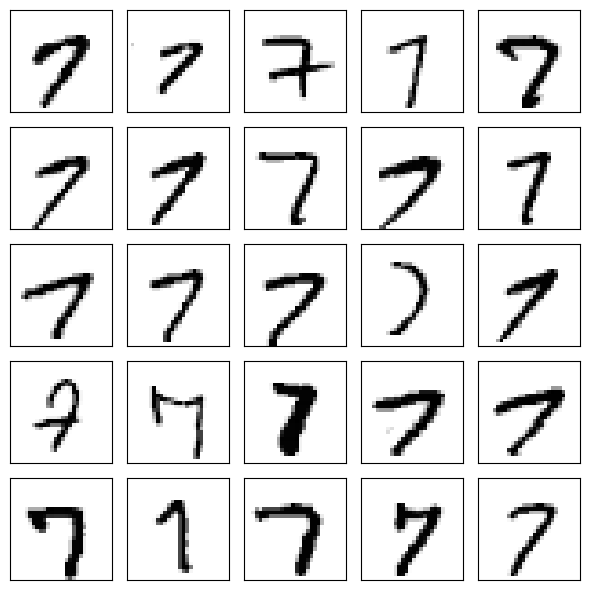

In [3]:
# creates a 5x5 grid of subplots, which will be used to display 25 images (5 rows and 5 columns)
# 'sharex=True' (resp. 'sharey=True') makes all subplots share the same x (resp. y) axis
# 'figsize=(8,8)' means that the whole image will be 8 inches wide and 8 inches high (or proportionately
# downscaled to fit the screen)
# 'fig' is the overall "canvas" or graphical space that arranges and contains the subplots and overall
# layout, while 'ax' is the set of subplots
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(6,6))
# converts the ax array from a 2D shape (5x5 grid) to a 1D array containing 25 elements; this flattening
# simplifies access to individual subplots as ax[i] rather than ax[row][col]
ax = ax.flatten()
# in particular, we can iterate over all subplots of 'ax' in a single loop :
for i in range(25):
    # X[y == 7]: Filters the dataset X to include only samples where the label y is equal to 7; then [i]
    # selects its i-th element; then '.reshape(28, 28)' reshapes the selected element to a 28x28 pixel
    # grid, which is the size of MNIST images
    img = X[y == 7][i].reshape(28, 28)
    # displays 'img' on the i-th subplot, with the color map set to grayscale (cmap='Greys')
    ax[i].imshow(img, cmap='Greys')
# removes tick marks from the first subplot; since 'sharex=True' and 'sharey=True' were set earlier,
# this removes ticks across all subplots.
ax[0].set_xticks([])
ax[0].set_yticks([])
# adjusts the subplot parameters to give a neat layout, ensuring images don’t overlap and fit within the
# figure comfortably
plt.tight_layout()
plt.show()

<br><p style="margin: 0; font-size: 12; font-weight: 500"><font color='darkblue'>$\quad$
        Finally, let’s divide the dataset into training, validation, and test subsets. The following code will split the dataset such that 55,000 images are used for training, 5,000 images for validation, and 10,000 images for testing :

In [4]:
from sklearn.model_selection import train_test_split
# 'X' is the input dataset and 'y' is the target dataset introduced in cell 2;
# 'test_size=10000' specifies that 10,000 samples should be included in the test set; the remaining
# samples (from X and y) will be part of the temporary datasets 'X_temp' and 'y_temp'
# 'random_state=123' sets a seed for the random number generator, ensuring reproducibility of the split
# (using the same seed will yield the same split every time we run the code);
# 'stratify=y' ensures that the split maintains the same proportion of classes in 'y_test' as in the
# original dataset 'y'
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=10000, random_state=123, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=5000, random_state=123,
                                                      stratify=y_temp)

<br><br><div style="font-family: Arial; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 14; font-weight: 600"><font color='darkpink'>2b. Implementing an MLP<a id="2b"></a></p>
    <p style="margin: 0; font-size: 12; font-weight: 500">$\quad$
        First, let's define two helper functions. The first, which we call <font color='green'>sigmoid<font color='darkblue'> is to compute the logistic sigmoid activations. And the second, <font color='green'>int_to_onehot<font color='darkblue'> is to convert integer class label arrays to one-hot encoded labels; we do this because otherwise the classifier would interpret images as being further apart when the differences of the digits they represent are greater, which is irrelevant here since we are only interested in the digits being correctly identified - a '7' being misidentified as a '1' should not weigh more heavily than a '5' being misidentified as a '6' - (about one-hot encoding, see part 4, "2d. Performing one-hot encoding on nominal features").<br>$\quad$
        Note that I have modified the code to follow the usual DL encoding, where each target is represented by a column vector (the book uses ML notations, encoding each target as a row).

In [5]:
def sigmoid(z):
    # clips large values to avoid overflow (a 'z' less than -500 will be replaced by -500; a 'z' larger
    # than 500 will be replaced by 500)
    z = np.clip(z, -500, 500)
    # in python 3, writing '1' instead of '1.' here yields the same result as the division operator
    # always produces a float; the book uses '1.'
    return 1. / (1. + np.exp(-z))

# Here I modify the book's code to get a DL encoding (where a target is represented by a column)
def int_to_onehot(y, num_labels):
    # initializes a 2D numpy array filled of '0', with the same number of columns as 'y' and 10 rows
    ary = np.zeros((num_labels, y.shape[0]))
    # iterates over each value in the array 'y', where 'i' is the index and 'val' is the target y[i],
    # so any i-th column of 'ary' has a single non-zero term, a '1' placed at index y[i]
    for i, val in enumerate(y): ary[val, i] = 1
    return ary

<br><p style="margin: 0; font-size: 12; font-weight: 500"><font color='darkblue'>$\quad$
        Then, the book gives the code to build a $2$-layer MLP from scratch, where the activation functions of both layers are sigmoid functions, and the cost is the $\,MSE\,$. I have modified the code in order to make it consistent with usual DL notations (that I presented in "1a. Architecture of an ANN - Forward pass", and used since then); the book uses ML notations instead.<br>$\quad$
        This $2$-layer MLP is built as a class, called <font color='green'>NeuralNetMLP<font color='darkblue'>, which contains three methods. The first one, <font color='green'>\_\_init__(self, n_features, n_hidden, n_classes, random_seed=123)<font color='darkblue'>, corresponds to the initialization of the weights and biases. The second one, <font color='green'>forward(self, X)<font color='darkblue'>, corresponds to the forward pass. And the third, <font color='green'>backward(self, X, A_h, A_out, Y)<font color='darkblue'>, uses the backward pass to compute the error matrices (via equations $(20)'$ and $(21)'$) and then computes the gradients of the cost with respect to the weights and biases for both layers (via equations $(22)'$ and $(23)'$).<br>$\quad$
        I have annotated the code of the first two methods within the code itself, but the third method needs some introduction here first.

<p style="margin: 0; font-size: 12; font-weight: 500"><font color='darkblue'>$\quad$
        The first part of this third method computes the error matrix $\Delta^{(L)}$ of the last layer (I have introduced the error matrices in "1d. Training of an ANN - BGD with Backpropagation", equation $(19)'$). According to $(20)'$, $\Delta^{(L)}_{ik} \;=\; \sigma^{(L)\,'} \!\left( Z^{(L)}_{ik} \right)$ <span font size = 4>$\frac{\partial C_k}{\partial \left(\widehat{y_k}\right)_i}$</span>.<br>
    Since here the activation function $\sigma^{(L)}$ is the sigmoid function $\sigma$, and since<font color='purple'>
        $$\sigma'(t) \,=\, \sigma(t) * \left(1-\sigma(t)\right) \qquad (26)$$<font color = 'darkblue'>
    we have<font color='purple'>
        $$\sigma^{(L)\,'} \!\left( Z^{(L)}_{ik} \right) \,=\, A^{(L)}_{ik} * \left(1-A^{(L)}_{ik}\right) \qquad (27)$$<font color = 'darkblue'>
    (according to $(3)'$).<br>
    Moreover, since here the cost function is the $\,MSE\,$,<font color='purple'>
        $$\frac{\partial C_k}{\partial \left(\widehat{y_k}\right)_i} \,=\, \frac{2}{m} \left[\left(\widehat{y_k}\right)_i - \left(y^{(k)}\right)_i\right] \,=\, \frac{2}{m} \left[\,A^{(L)}_{ik} - Y_{ik}\right] \qquad (28)$$<font color = 'darkblue'>
    (where $Y$ is the matrix whose $k$-th column is the one-hot encoded version of the target $y^{(k)}$, and according to (8)'). Hence<font color='darkpink'>
        $$\Delta^{(L)}_{ik} \,=\, A^{(L)}_{ik} * \left(1-A^{(L)}_{ik}\right) * \frac{2}{m} \left[\,A^{(L)}_{ik} - Y_{ik}\right] \qquad (29)$$<font color = 'darkblue'>
    or, equivalently, using the pointwise products,<font color='darkpink'>
        $$\Delta^{(L)} \,=\, A^{(L)} \odot \left(\mathbf{1}-A^{(L)}\right) \odot \frac{2}{m} \left[\,A^{(L)} - Y\right] \qquad (30)$$<font color = 'darkblue'>
    where $\,\mathbf{1} \in \mathbb{R}^{K \times m}\,$ is the $\,K \!\times\! m\,$ matrix whose components are all equal to $1$.<br><br>$\quad$
            Once $\Delta^{(L)}$ has been computed, we can get the other $\Delta^{(l)}$ by backpropagation, using $(21)'$, ie<font color = 'darkpink'>
        $$\Delta^{(l)} \,=\, \sigma^{(l)\,'} \!\left( Z^{(l)} \right) \odot \left( W^{(l+1) \; T} \, \Delta^{(l+1)} \right) \,=\, A^{(l)} \odot \left(\mathbf{1}-A^{(l)}\right) \odot \left( W^{(l+1) \; T} \, \Delta^{(l+1)} \right) \qquad (31)$$ 

In [6]:
class NeuralNetMLP:

    def __init__(self, n_features, n_hidden, n_classes, random_seed=123):
        # calls the initializer of the parent class, in case one will be added later
        super().__init__()

        # stores the num_classes parameter as an instance variable, to be used in another method (here,
        # the 'backward' method)
        self.n_classes = n_classes

        # creates a random number generator with a specified seed (123 by default), ensuring that the
        # random weights are reproducible
        rng = np.random.RandomState(random_seed)
        
        # Initialization of the hidden layer
        # generates weights for the hidden layer, drawing them from a normal distribution with a mean
        # of 0.0 and a standard deviation of 0.1. The shape of the weight matrix is
        # 'n_hidden'*'n_features' (ie it follows the usual DL notations)
        self.weight_h = rng.normal(loc=0.0, scale=0.1, size=(n_hidden, n_features))
        # the hidden bias is initialized as the null 1D-array of length 'n_hidden'
        self.bias_h = np.zeros(n_hidden)
        
        # output layer
        self.weight_out = rng.normal(loc=0.0, scale=0.1, size=(n_classes, n_hidden))
        self.bias_out = np.zeros(n_classes)


    def forward(self, X):
        # Hidden layer
        # The weight matrix is multiplied with the transpose of the training matrix 'X'; the result is
        # a 'n_hidden'*m matrix (m being the number of instances in X). 'self.bias_h' is a 1D-array of
        # length 'n_hidden'; to transform it into a 2D-array we transform it into the corresponding
        # 'n_hidden*1' 2D-array 'self.bias_h[:, np.newaxis]'; then Numpy uses "broadcasting", ie here
        # it copies it m times to get a 'n_hidden'*m matrix and only then performs the addition
        # Note that it is also possible to use this 'forward' method with a single example, resulting
        # in 'z_h' being a 1D-array of length 'n_hidden'
        Z_h = np.dot(self.weight_h, X.T) + self.bias_h[:, np.newaxis]
        # When a function from the set of real numbers to itself is applied to an array of any shape,
        # Numpy automatically applies it element-wise
        A_h = sigmoid(Z_h)

        # Output layer
        Z_out = np.dot(self.weight_out, A_h) + self.bias_out[:, np.newaxis]
        A_out = sigmoid(Z_out)
        return A_h, A_out


    def backward(self, X, A_h, A_out, Y):  
    
        # onehot encoding of the variable 'y'
        Y_onehot = int_to_onehot(Y, self.n_classes)

        # PART 1 : computation of the error matrix on the output layer       
        # 'd_loss__d_a_out' is the gradient of the MSE when the output is 'A_out', the matrix of shape
        # 'n_classes'*m whose k-th column corresponds to the prediction for the k-th instance,
        # and the target is the encoding of 'Y'
        d_loss__d_a_out = 2.*(A_out - Y_onehot) / Y_onehot.shape[1]
        # the derivative of the sigmoid can be computed via sigmoid' = sigmoid*(1-sigmoid); using
        # Numpy's broadcasting (for '1.-A_out') and pointwise product (for '*'), the derivative of the
        # sigmoid applied to the pre-activation Z_out is computed by
        d_a_out__d_z_out = A_out * (1. - A_out)
        # the matrix of errors on the output layer is the pointwise product of the previous two lines
        Delta_out = d_loss__d_a_out * d_a_out__d_z_out

        # jacobian of the cost wrt weight_out (eq (23)')
        d_loss__dw_out = np.dot(Delta_out, A_h.T)
        # gradient of the cost wrt bias_out (eq (22)')
        d_loss__db_out = np.sum(Delta_out, axis=1)
        
        
        # PART 2 : computation of the error matrix on the hidden layer
        # the derivative of the sigmoid applied to the pre-activation Z_h is computed by
        d_a_h__d_z_h = A_h * (1. - A_h)
        # then the matrix of errors on the hidden layer is (according to (31))
        Delta_h = d_a_h__d_z_h * np.dot(self.weight_out.T, Delta_out)

        # jacobian of the cost wrt weight_h (eq (23)')
        d_loss__dw_h = np.dot(Delta_h, X)
        # gradient of the cost wrt bias_h (eq (22)')
        d_loss__db_h = np.sum(Delta_h, axis=1)


        # returns all the derivatives used to update all the parameters
        return (d_loss__dw_out, d_loss__db_out, d_loss__dw_h, d_loss__db_h)

<br><p style="margin: 0; font-size: 12; font-weight: 500"><font color='darkblue'>$\quad$
        Let's instantiate a <font color='green'>NeuralNetMLP<font color='darkblue'> object for the MNIST dataset. It has $784$ features (pixels' values) and $10$ classes (figures from $0$ to $9$). The hidden layer consists of $50$ nodes :

In [7]:
model = NeuralNetMLP(n_features=28*28, n_hidden=50, n_classes=10)

<br><br><div style="font-family: Arial; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 14; font-weight: 600"><font color='darkpink'>2c. Training an MLP<a id="2c"></a></p>
    <p style="margin: 0; font-size: 12; font-weight: 500">$\quad$
        We will train our <font color='green'>model<font color='darkblue'> (defined in the previous cell) with a Mini-batch Gradient Descent algorithm (<font color='purple'>MGD<font color='darkblue'> for short). Each step of the backpropagation algorithm will use $100$ examples instead of the $55,000$ contained in <font color='green'>X_train<font color='darkblue'>.<br>$\quad$
        Our first step is to define is a mini-batch generator, which takes in our dataset and divides it into mini-batches of a desired size :

In [8]:
num_epochs = 50
minibatch_size = 100

def minibatch_generator(X, y, minibatch_size):
    # creates a 1D array of indices from 0 to m-1 (m being the number of samples in X)
    indices = np.arange(X.shape[0])
    # shuffles the 'indices' array to randomize the order of examples in each epoch
    np.random.shuffle(indices)
    # iterates over the indices array in steps of 'minibatch_size', stopping before reaching the end
    # 'start_idx' marks the beginning index of each mini-batch within the shuffled indices
    # to stop at 'indices.shape[0] - minibatch_size + 1' ensures that each mini-batch will have
    # 'minibatch_size' elements; if the number of instances is not a multiple of 'minibatch_size' then
    # the indices at the end of 'indices' will not be used
    for start_idx in range(0, indices.shape[0] - minibatch_size + 1, minibatch_size):
        # slices 'indices' to obtain the 1D array 'batch_idx' of size 'minibatch_size' containing the
        # indices of the current mini-batch
        batch_idx = indices[start_idx:start_idx + minibatch_size]
        # yields the mini-batch samples from 'X' and 'y' at the selected indices
        # When 'yield' is used, each time the function is called, it pauses after yielding a
        # mini-batch, preserving its state, so it can generate the next mini-batch on the next call;
        # 'return' would instead deliver all mini-batches at once in a single output, which would
        # consume significant memory for large datasets in order to store all the mini-batches
        yield X[batch_idx], y[batch_idx]

<br><p style="margin: 0; font-size: 12; font-weight: 500"><font color='darkblue'>$\quad$
        We could define the cost function and performance metric to use to monitor the training process and evaluate the model on whole datasets :

In [9]:
def mse_loss(targets, probas, num_labels=10):
    onehot_targets = int_to_onehot(targets, num_labels=num_labels)
    return np.mean((onehot_targets - probas)**2)

def accuracy(targets, predicted_labels):
    return np.mean(predicted_labels == targets)

<p style="margin: 0; font-size: 12; font-weight: 500"><font color='darkblue'>$\quad$
        If we do only one forward pass, the parameters will not be updated, and since there are $10$ classes we should get an accuracy of around $1/10$. Let's try this on the validation dataset :

In [10]:
_, probas = model.forward(X_valid)
mse = mse_loss(y_valid, probas)
print(BB + "Initial validation MSE :" + MB, round(mse, 2))

# the predicted labels are the argmax of the columns of the output matrix :
predicted_labels = np.argmax(probas, axis=0)
acc = accuracy(y_valid, predicted_labels)
print(BB + "Initial validation accuracy :" + MB, round(acc*100, 2))

Initial validation MSE : 0.24
Initial validation accuracy : 11.2


<br><p style="margin: 0; font-size: 12; font-weight: 500"><font color='darkblue'>$\quad$
        In practice, our computer memory is a limiting factor for how much data the model can ingest in one forward pass (due to the large matrix multiplications). So we will compute our MSE and accuracy computation incrementally by iterating over the dataset one mini-batch at a time, using our previous <font color='green'>minibatch_generator<font color='darkblue'> (coded cell 8) :

In [11]:
def compute_mse_and_acc(nnet, X, y, num_labels=10, minibatch_size=100):
    mse, correct_pred, num_examples = 0., 0, 0
    minibatch_gen = minibatch_generator(X, y, minibatch_size)
    for i, (features, targets) in enumerate(minibatch_gen):
        _, probas = nnet.forward(features)
        predicted_labels = np.argmax(probas, axis=0)
        onehot_targets = int_to_onehot(targets, num_labels=num_labels)
        mse += np.mean((onehot_targets - probas)**2)
        correct_pred += (predicted_labels == targets).sum()
        # if the generator used is 'minibatch_generator' then 'targets.shape[0]' will always have the
        # value 'minibatch_size' (see annotations cell 8)
        num_examples += targets.shape[0]
    mse = mse/i
    acc = correct_pred/num_examples
    return mse, acc

<p style="margin: 0; font-size: 12; font-weight: 500"><font color='darkblue'>$\quad$
        If we do only one forward pass on the validation dataset as above, we get similar results :

In [12]:
mse, acc = compute_mse_and_acc(model, X_valid, y_valid)
print(BB + "Initial validation MSE :" + MB, round(mse, 2))
print(BB + "Initial validation accuracy :" + MB, round(acc*100, 2))

Initial validation MSE : 0.25
Initial validation accuracy : 11.2


<br><p style="margin: 0; font-size: 12; font-weight: 500"><font color='purple'>$\quad$
        Let’s now get to the main part and implement the code to train our model.<font color='darkblue'><br>$\quad$
        First, we get the activations of both layers <font color='green'>A_h<font color='darkblue'> and <font color='green'>A_out<font color='darkblue'> by using the <font color='green'>forward<font color='darkblue'> method (of the <font color='green'>NeuralNetMLP<font color='darkblue'> class coded at point 6). Then we get all the derivatives of the cost function relative to the weights and biases by using the <font color='green'>backward<font color='darkblue'> method (of the same class). These derivatives allow us to update the weights and biases (via $(18)$); we just need to choose a learning rate.<br>$\quad$
        I have tried many learning rates, with $50$ or $100$ epochs, constant and linearly decreasing. While the accuracies do not improve monotonously, they tend to improve when we increase the number of epochs. I have left the learning rate which gives the best results here, both if we use $100$ epochs or only $50$. It is a linearly decreasing learning rate which starts at $0.1$ and ends at $0.025$, whether we use $50$ or $100$ epochs. With $100$ epochs, we get an accuracy of $94.96\%$ :

In [13]:
def train(model, X_train, y_train, X_valid, y_valid, num_epochs, learning_rate=0.1):
    epoch_train_mse = []
    epoch_train_acc = []
    epoch_valid_acc = []
    
    for e in range(num_epochs):
        # iterate over minibatches
        minibatch_gen = minibatch_generator(X_train, y_train, minibatch_size)
        for X_train_mini, y_train_mini in minibatch_gen:
            # computes activations
            A_h, A_out = model.forward(X_train_mini)
            # computes derivatives of the cost wrt weights and biases
            d_loss__dw_out, d_loss__db_out, d_loss__dw_h, d_loss__db_h = \
                model.backward(X_train_mini, A_h, A_out, y_train_mini)
            # updates weights and biases; I've introduced a decreasing learning rate
            learning_rate_e = (1-.75*e/num_epochs)*learning_rate
            model.weight_h -= learning_rate_e * d_loss__dw_h
            model.bias_h -= learning_rate_e * d_loss__db_h
            model.weight_out -= learning_rate_e * d_loss__dw_out
            model.bias_out -= learning_rate_e * d_loss__db_out
        #### Epoch Logging ####
        train_mse, train_acc = compute_mse_and_acc(model, X_train, y_train)
        valid_mse, valid_acc = compute_mse_and_acc(model, X_valid, y_valid)
        train_acc, valid_acc = train_acc*100, valid_acc*100
        epoch_train_mse.append(train_mse)
        epoch_train_acc.append(train_acc)
        epoch_valid_acc.append(valid_acc)
        # I don't want all the lines printed, so I add a condition
        if (e+1) % 5 == 0 :
            print(BB + "Epoch :" + MB, e+1, BB + "/" + MB, num_epochs,
                  BB + "| Train MSE :" + MB, round(train_mse, 2),
                  BB + "| Train Acc :" + MB, round(train_acc, 2),
                  BB + "| Valid Acc :" + MB, round(valid_acc, 2))
    return epoch_train_mse, epoch_train_acc, epoch_valid_acc

In [14]:
np.random.seed(123) # for the training set shuffling
epoch_loss, epoch_train_acc, epoch_valid_acc = train(model, X_train, y_train, X_valid, y_valid,
                                                     num_epochs=100, learning_rate=0.1)

Epoch : 5 / 100 | Train MSE : 0.02 | Train Acc : 89.42 | Valid Acc : 89.66
Epoch : 10 / 100 | Train MSE : 0.02 | Train Acc : 90.66 | Valid Acc : 90.36
Epoch : 15 / 100 | Train MSE : 0.01 | Train Acc : 91.88 | Valid Acc : 91.94
Epoch : 20 / 100 | Train MSE : 0.01 | Train Acc : 92.34 | Valid Acc : 92.44
Epoch : 25 / 100 | Train MSE : 0.01 | Train Acc : 92.54 | Valid Acc : 92.28
Epoch : 30 / 100 | Train MSE : 0.01 | Train Acc : 92.97 | Valid Acc : 93.28
Epoch : 35 / 100 | Train MSE : 0.01 | Train Acc : 93.21 | Valid Acc : 92.6
Epoch : 40 / 100 | Train MSE : 0.01 | Train Acc : 93.69 | Valid Acc : 93.24
Epoch : 45 / 100 | Train MSE : 0.01 | Train Acc : 93.77 | Valid Acc : 93.66
Epoch : 50 / 100 | Train MSE : 0.01 | Train Acc : 94.06 | Valid Acc : 93.44
Epoch : 55 / 100 | Train MSE : 0.01 | Train Acc : 94.01 | Valid Acc : 93.62
Epoch : 60 / 100 | Train MSE : 0.01 | Train Acc : 94.49 | Valid Acc : 94.16
Epoch : 65 / 100 | Train MSE : 0.01 | Train Acc : 94.51 | Valid Acc : 94.02
Epoch : 70 / 1

<br><br><div style="font-family: Arial; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 14; font-weight: 600"><font color='darkpink'>2d. Evaluating an MLP<a id="2d"></a></p>
    <p style="margin: 0; font-size: 12; font-weight: 500">$\quad$
        In the previous codes (cells 13 and 14) we computed and collected the cost ($MSE$) of the model on the training dataset across the $100$ epochs. Let's plot the values obtained :

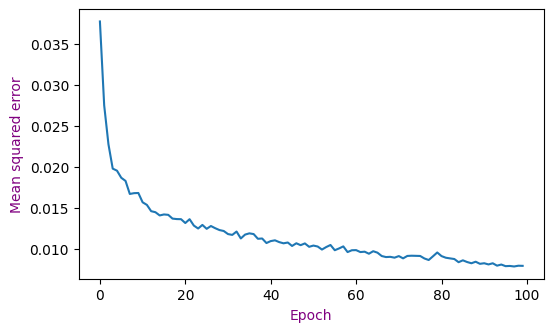

In [15]:
plt.figure(figsize=(6, 3.5))
plt.plot(range(len(epoch_loss)), epoch_loss)
plt.xlabel('Epoch', color="purple")
plt.ylabel('Mean squared error', color="purple")
plt.show()

<p style="margin: 0; font-size: 12; font-weight: 500"><font color='darkblue'>$\quad$
        As we can see, the cost decreased substantially during the first 20 epochs and seems to slowly converge in the last 20 epochs. However, the small slope between epoch 40 and epoch 50 indicates that the loss would further slightly decrease with training over additional epochs.<br>$\quad$
        Next, let’s take a look at the training and validation accuracy :

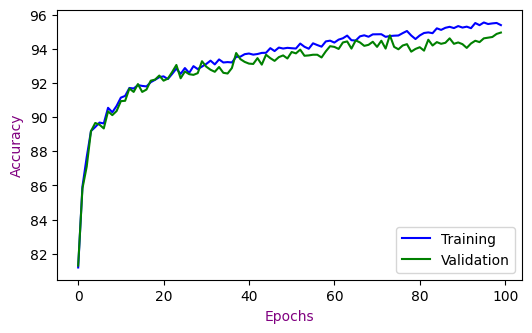

In [16]:
plt.figure(figsize=(6, 3.5))
plt.plot(range(len(epoch_train_acc)), epoch_train_acc, color="blue", label='Training')
plt.plot(range(len(epoch_valid_acc)), epoch_valid_acc, color="green", label='Validation')
plt.xlabel('Epochs', color="purple")
plt.ylabel('Accuracy', color="purple")
plt.legend(loc='lower right')
plt.show()

<p style="margin: 0; font-size: 12; font-weight: 500"><font color='darkblue'>$\quad$
        The plot reveals that, at approximately the 25th epoch, the training and validation accuracy values are almost equal, and then the network starts to slightly overfit the training data.<br>$\quad$
        In order to reduce overfitting, we may use $L^1$ or $L^2$ regularizations, dropouts, or batch normalizations. We will see these techniques later.<br>$\quad$
        Finally, let’s evaluate the generalization performance of the model by calculating the prediction accuracy on the test dataset :

In [17]:
test_mse, test_acc = compute_mse_and_acc(model, X_test, y_test)
print(BB + "Test accuracy :" + MB, round(test_acc*100, 2))

Test accuracy : 94.31


<p style="margin: 0; font-size: 12; font-weight: 500"><font color='darkblue'>$\quad$
        We can see that the test accuracy is close to the validation set accuracy ($94.96\%$). Moreover, the respective training accuracy is only minimally higher at $95.40\%$, reaffirming that our model only slightly overfits the training data.<br>$\quad$
        To further fine-tune the model, we could change the number of layers, the number of hidden units, the weight initializations, the learning rate, or use various other tricks beyond the scope of the book. In part 14, "Classifying Images with Deep Convolutional Neural Networks", we will learn about a different Neural Network architecture that is known for its good performance on image datasets (CNN).

<br><p style="margin: 0; font-size: 12; font-weight: 500"><font color='darkblue'>$\quad$
        Lastly, let’s take a look at some of the images that our MLP struggles with by extracting and plotting the first 25 misclassified samples from the test set :

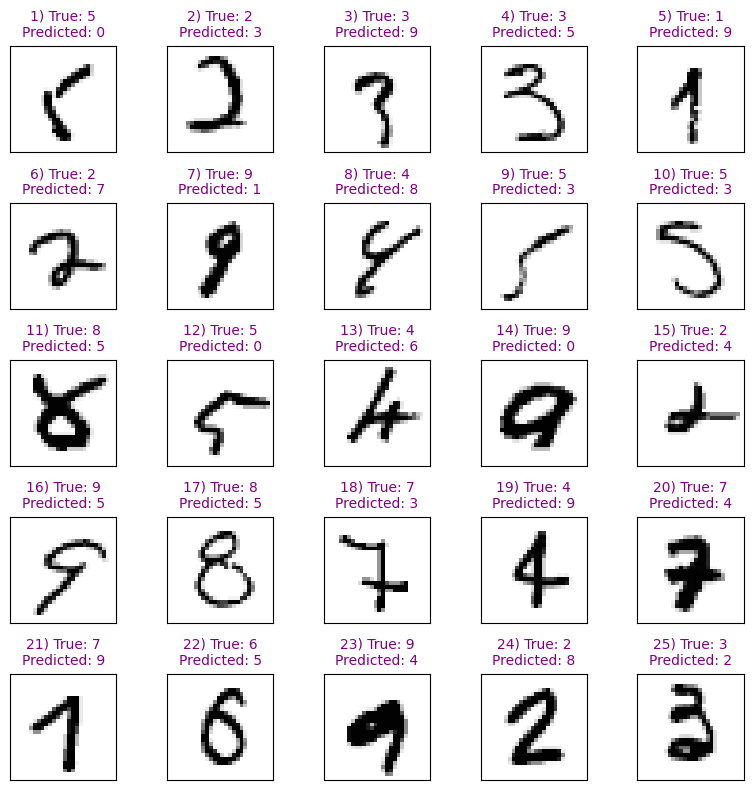

In [18]:
# First, we collect the first 25 misclassified instances and their correct labels
X_test_subset = X_test[:1000, :]
y_test_subset = y_test[:1000]
_, probas = model.forward(X_test_subset)
test_pred = np.argmax(probas, axis=0)
misclassified_images = X_test_subset[y_test_subset != test_pred][:25]
misclassified_labels = test_pred[y_test_subset != test_pred][:25]
correct_labels = y_test_subset[y_test_subset != test_pred][:25]

# Now we represent the data in a diagram, much like we did in cell 3
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(8,8))
ax = ax.flatten()
for i in range(25):
    img = misclassified_images[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    ax[i].set_title(f'{i+1}) True: {correct_labels[i]}\nPredicted: {misclassified_labels[i]}',
                    fontsize=10, color="purple")
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

<p style="margin: 0; font-size: 12; font-weight: 500"><font color='darkblue'>$\quad$
        As we can see, among mistakes, the network finds $7$s challenging when they include a horizontal line as in examples $18$ and $20$. Looking back at the figure plotted in cell 3, where we presented different training examples of the number $7$, we can hypothesize that the handwritten digit $7$ with a horizontal line is underrepresented in our dataset and is often misclassified.